# Background

Seaborn is a Python data visualization library built on top of Matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics. Seaborn is particularly well-suited for visualizing complex datasets with multiple variables. It comes with several built-in themes and color palettes to make it easy to create aesthetically pleasing and informative plots. Matplotlib provides a lower-level interface and more power, but at a cost of being more complicated.

We will be working with the Titanic Dataset and creating some visualizations! 

# Setup

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Include matplotlib graphics inside the notebook
%matplotlib inline 

In [2]:
sns.set_style('whitegrid')
# See https://seaborn.pydata.org/tutorial/aesthetics.html

# Load data

In [3]:
titanic_df = sns.load_dataset('titanic')# Loads from the seaborn datasets
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Histogram

This code uses `np.histogram` from `numpy` to create `bins` and `counts` for a histogram, than `plt.hist` from `matplotlib` to visualize them.

* `titanic_df['fare']`: This extracts the `fare` column 
(which contains the fare information for each passenger) from the Titanic dataset.
* `bins=30`: Specifies the number of bins in the histogram.
* `bins[:-1]`: This parameter removes the last bin.

The resulting plot will be a histogram representing the distribution of fares in the Titanic dataset. 
Each bar in the histogram represents the `count` (or frequency) of passengers falling within a specific `fare` range (bin), and the x-axis represents the `fare` values while the y-axis represents the `count`.

(array([496., 191.,  45.,  45.,  48.,  13.,  11.,  11.,   9.,   2.,   0.,
          0.,   5.,   4.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  17.07764,  34.15528,  51.23292,  68.31056,  85.3882 ,
        102.46584, 119.54348, 136.62112, 153.69876, 170.7764 , 187.85404,
        204.93168, 222.00932, 239.08696, 256.1646 , 273.24224, 290.31988,
        307.39752, 324.47516, 341.5528 , 358.63044, 375.70808, 392.78572,
        409.86336, 426.941  , 444.01864, 461.09628, 478.17392, 495.25156,
        512.3292 ]),
 <BarContainer object of 30 artists>)

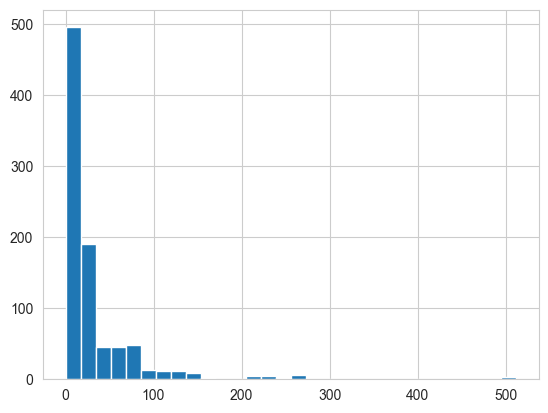

In [4]:
counts, bins = np.histogram(titanic_df['fare'], bins=30)
plt.hist(bins[:-1], bins, weights=counts)

The provided code using `sns.histplot` from seaborn creates a histogram for the `fare` column
in the Titanic dataset. Let's break down what each component does:

`sns.histplot`: This is a Seaborn function used to plot histograms.

* `titanic_df['fare']` and `bins=30` are as before.
* `kde=False`: Disables the kernel density estimate (KDE) curve on top of the histogram. 
The KDE is a smooth curve that estimates the probability density function of the variable.
* `color='red'`: Sets the color of the histogram to red.

<Axes: xlabel='fare', ylabel='Count'>

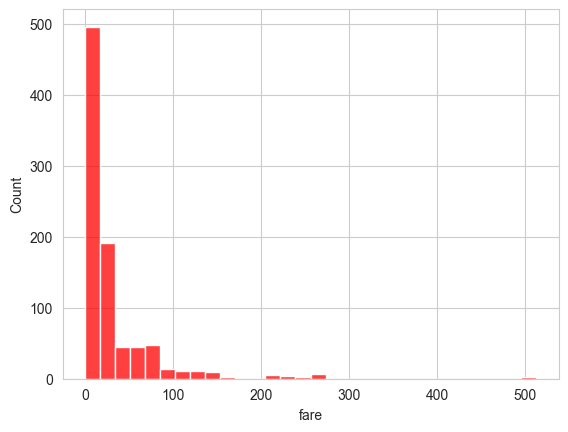

In [5]:
sns.histplot(titanic_df['fare'], bins=30, kde=False, color='red')

# Scatter plots

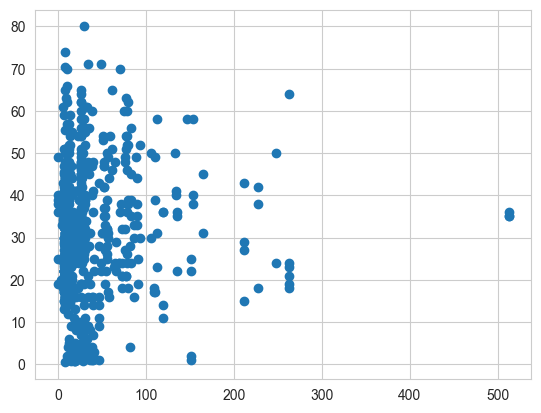

In [6]:
plt.scatter(titanic_df['fare'], titanic_df['age'])

<Axes: xlabel='fare', ylabel='age'>

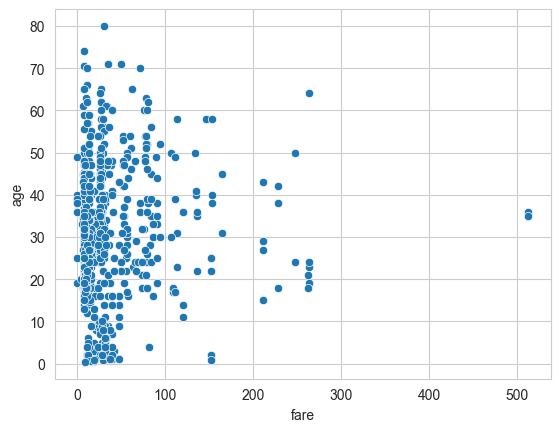

In [7]:
sns.scatterplot(x='fare',y='age',data=titanic_df)

# Matplotlib Hexbin plots

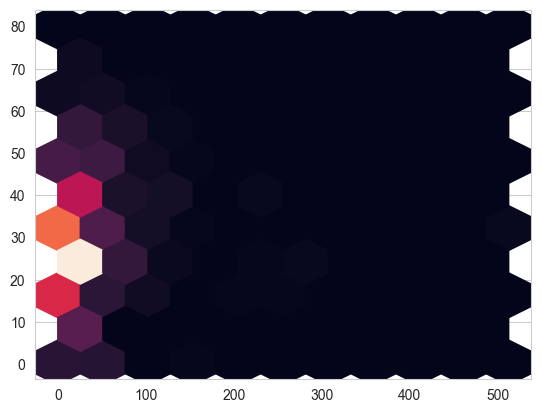

In [8]:
plt.hexbin(titanic_df['fare'], titanic_df['age'], gridsize=10)

# Seaborn Joint Plot

`sns.jointplot`: This is the seaborn function to create a joint plot.
A joint plot allows you to visualize the relationship between two variables (in this case, `fare` and `age`)
by displaying both a scatter plot and histograms of each variable. 

- The `x='fare'` parameter specifies that the quantitative variable `fare` will be plotted on the x-axis.
- The `y='age'` parameter specifies that the numerical variable `age` will be plotted on the y-axis, representing the ages of the passengers.
- The `data=titanic_df` parameter specifies that the data to be used for plotting is the Titanic dataset loaded earlier.

The scatter plot in the center of the joint plot displays the relationship between `fare` and `age`. 
Each point represents an observation (a passenger in this case) with the x-coordinate
being the fare they paid and the y-coordinate being their age.

The histograms on the top and right side show the distributions of `fare` and `age` respectively. 
The top histogram shows the distribution of fares, and the right histogram shows the distribution of ages.
This joint plot helps to visualize the distribution of fares and ages of the passengers aboard the Titanic,
as well as any potential correlation or patterns between the two variables.


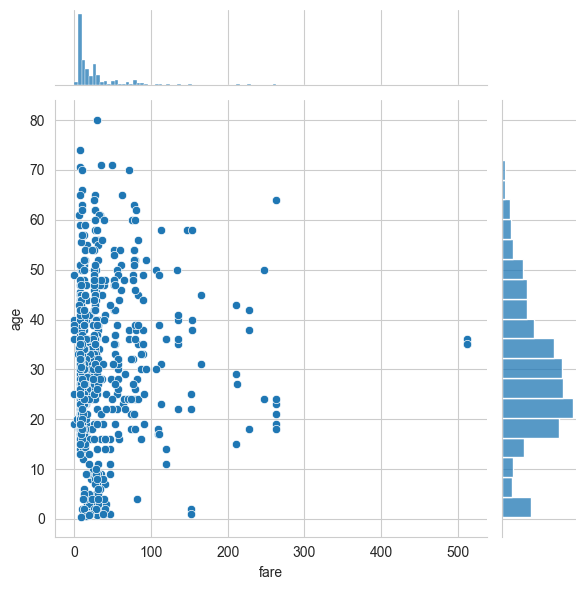

In [9]:
sns.jointplot(x='fare',y='age',data=titanic_df)
plt.savefig('joint_fair_age.png')
plt.savefig('joint_fair_age.svg', format='svg')

# Box, Swarm, and Violin Plots

This line creates a box plot using seaborn.
A box plot is a graphical representation of the distribution of a dataset based on a five-number summary: 
the minimum, first quartile (Q1), median (second quartile or Q2), third quartile (Q3), and maximum.
- The `x='class'` parameter specifies that the categorical variable `class` will be plotted on the x-axis, representing the classes of the passengers (e.g., `First` class, `Second` class, `Third` class).
- The `y='age'` and `data=titanic_df` parameters are as before.
- The `hue='class'` and `palette='Set2'` parameters sets the color palette to `Set2` from ColorBrewer, which will be used to color the boxes in the plot. See <http://seaborn.pydata.org/generated/seaborn.color_palette.html> for options.

The resulting box plot:

For each class (e.g., `First` class, `Second` class, `Third` class) on the x-axis, a box is plotted.
The box represents the interquartile range (IQR) of the distribution of ages within that class. 
The bottom and top edges of the box correspond to the first quartile (Q1) and third quartile (Q3) 
respectively. The horizontal line within the box represents the median (Q2).

The "whiskers" extend from the box to the minimum and maximum values within a certain range (usually 1.5 times the IQR).
Any data points outside this range are considered outliers and are plotted as individual points.
This visualization helps to compare the distribution of ages across different passenger classes 
and identify any variations or outliers in the age distribution within each class.
The choice of using a box plot in this context is useful for understanding the distribution and 
variability of ages within each passenger class on the Titanic.

<Axes: xlabel='class', ylabel='age'>

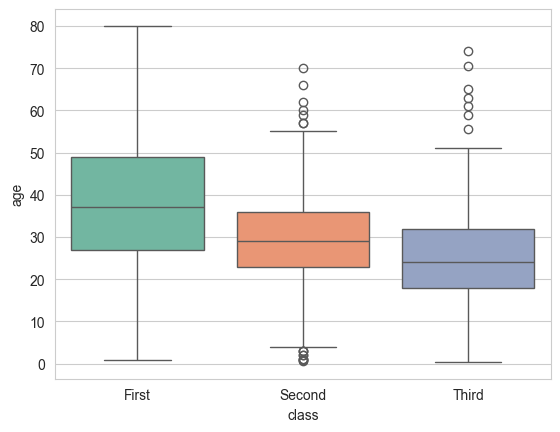

In [10]:
sns.boxplot(x='class',y='age',hue='class',data=titanic_df,palette='Set2')

`sns.swarmplot`: This is the seaborn function for creating a swarm plot.

* Most parameters are as before.
* The `s=4` parameter sets the size of the points to `4`, making them smaller in the plot.

In the swarm plot, the points are spread out horizontally to avoid overlap, giving a clear view of the distribution of ages within each class.
The different colors (from the specified palette) indicate different passenger classes, helping to distinguish between them.
This type of plot is useful for visualizing the distribution of ages within each passenger class and understanding how age is distributed within the classes.
In summary, the code creates a swarm plot that displays the distribution of ages for each passenger class, allowing easy comparison and identification of patterns within the `age` variable based on the `class`.


<Axes: xlabel='class', ylabel='age'>

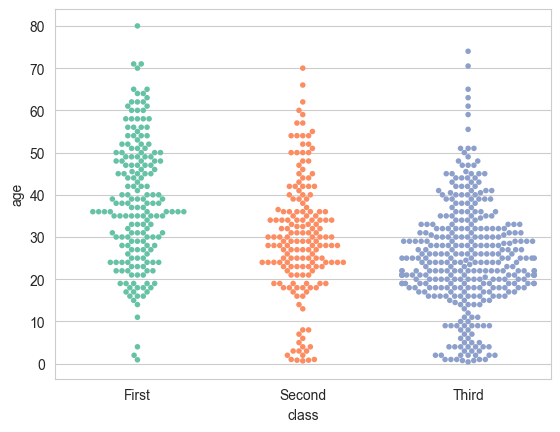

In [11]:
sns.swarmplot(x='class',y='age',data=titanic_df,palette='Set2', hue='class', s=4)

`sns.violinplot`: This is the seaborn function for creating a violin plot.

* Most parameters are as before.
* The `cut=0` clips the ends of the plot at the extremes of the datum instead of continuing.

<Axes: xlabel='class', ylabel='age'>

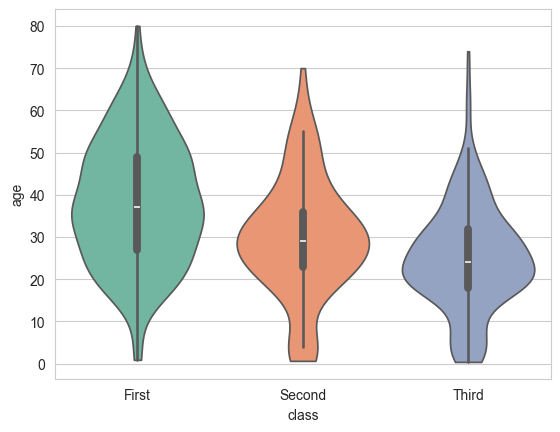

In [12]:
sns.violinplot(x='class',y='age',data=titanic_df,palette='Set2', hue='class', cut=0)

# Count plot

`sns.countplot`: This is the seaborn function to create a count plot.

* The `x='sex'` parameter specifies that the categorical variable `sex` will be plotted on the x-axis, representing the gender of the passengers (`male` or `female`).
* Data is as before.

The resulting count plot shows o the x-axis two bars: one for `male` and one for `female`, representing the two categories of the `sex` variable.
The height of each bar corresponds to the count or frequency of observations in each category. For example, the height of the `male` bar represents the number of male passengers, and the height of the `female` bar represents the number of female passengers.
This plot helps visualize the distribution of the `sex` variable and provides a quick comparison of the count of male and female passengers.
In summary, the code generates a count plot that displays the number of male and female passengers in the Titanic dataset, providing a simple and informative visualization of the gender distribution within the dataset.


<Axes: xlabel='sex', ylabel='count'>

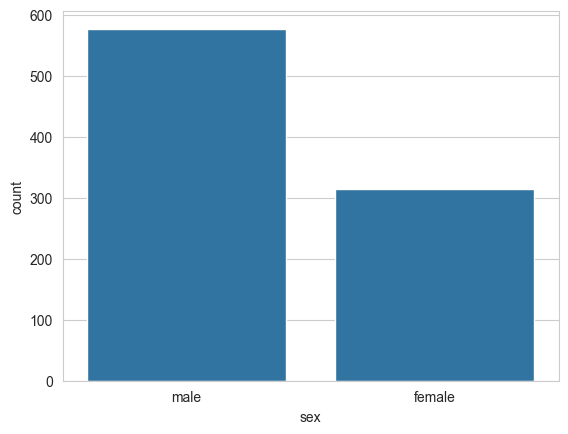

In [13]:
sns.countplot(x='sex',data=titanic_df)

# Facet Grid

`sns.FacetGrid`: This seaborn function initializes a grid for plotting.

* Data is as before.
* `col='sex'` indicates that the grid will have separate columns for each unique value in the `sex` column.
* `g.map()` from `matplotlib` (called `plt`) is used to apply plotting functions across the facets of the grid.
* `plt.hist` is the `matplotlib` plotting function to create histograms.
* `'age'` is the variable being plotted in each facet.

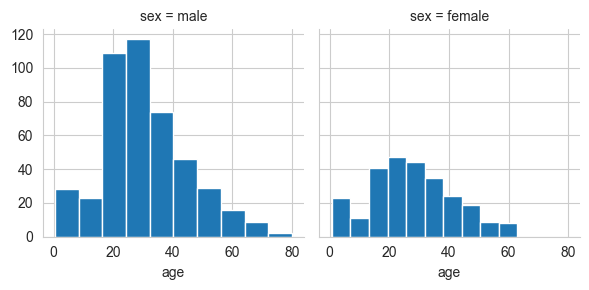

In [14]:
g = sns.FacetGrid(data=titanic_df,col='sex')
g.map(plt.hist,'age')

# Pair Plot

`sns.pairplot`: This seaborn function for a pair plot

* Data is as before but we filter to the columns `['age','pclass','survived','fare']`.
* `kind='hist'` says to use a colored heatmap rather than points that overplot. `kde` is an alternate.

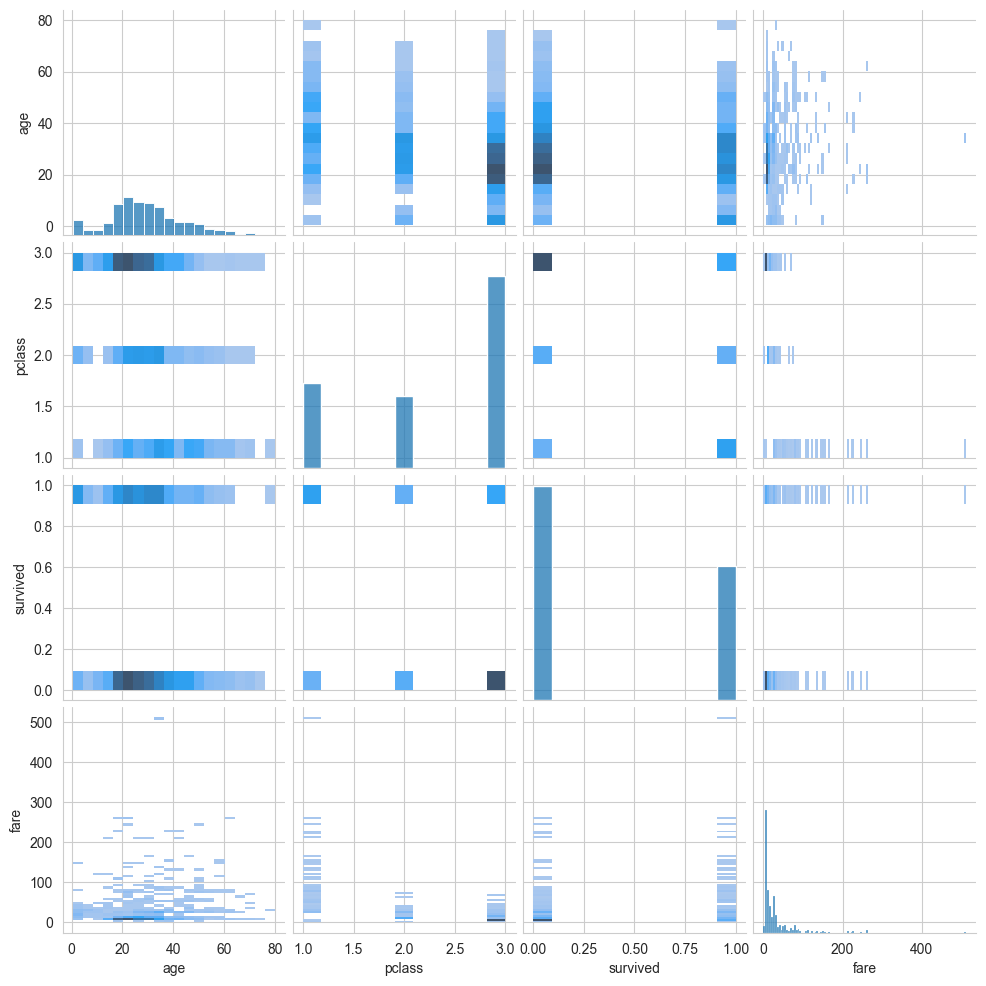

In [15]:
sns.pairplot(data=titanic_df[['age','pclass','survived','fare']], kind='hist')